In [1]:
# --- Setup ---
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (8,6)

# --- Paths (change these according to your setup) ---
DATA_DIR = r"diabetic_retinography_dataset"
CSV_PATH = os.path.join(DATA_DIR, "train.csv")
IMG_DIR = os.path.join(DATA_DIR, "colored_images")

# Load CSV
df = pd.read_csv(CSV_PATH)
df.head()


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [2]:
# --- Basic info ---
print("Total rows:", len(df))
print("Columns:", list(df.columns))
print(df['diagnosis'].value_counts().sort_index())

# Summary statistics
df.describe(include='all')


Total rows: 3662
Columns: ['id_code', 'diagnosis']
diagnosis
0    1805
1     370
2     999
3     193
4     295
Name: count, dtype: int64


,id_code,diagnosis
count,3662,3662.000000
unique,3662,NaN
top,000c1434d8d7,NaN
freq,1,NaN
mean,NaN,1.126980
std,NaN,1.298409
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,2.000000


C:\Users\niraj\AppData\Local\Temp\ipykernel_22844\1249036633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_name', data=df, palette='viridis')


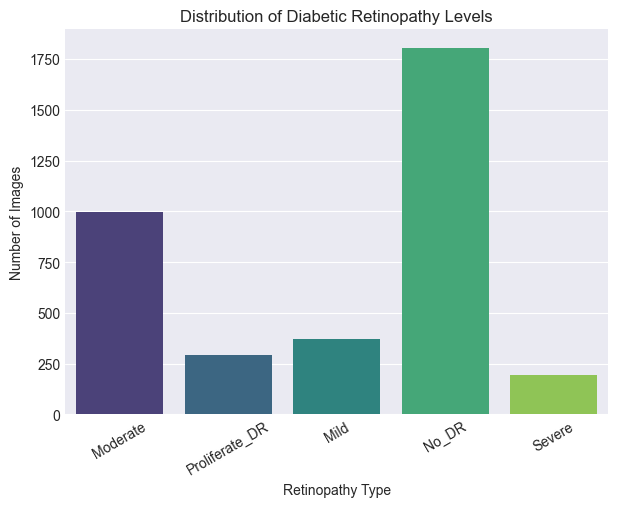

In [3]:
# --- Visualize label distribution ---
label_map = {0: "No_DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferate_DR"}
df['label_name'] = df['diagnosis'].map(label_map)

plt.figure(figsize=(7,5))
sns.countplot(x='label_name', data=df, palette='viridis')
plt.title("Distribution of Diabetic Retinopathy Levels")
plt.xlabel("Retinopathy Type")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.show()


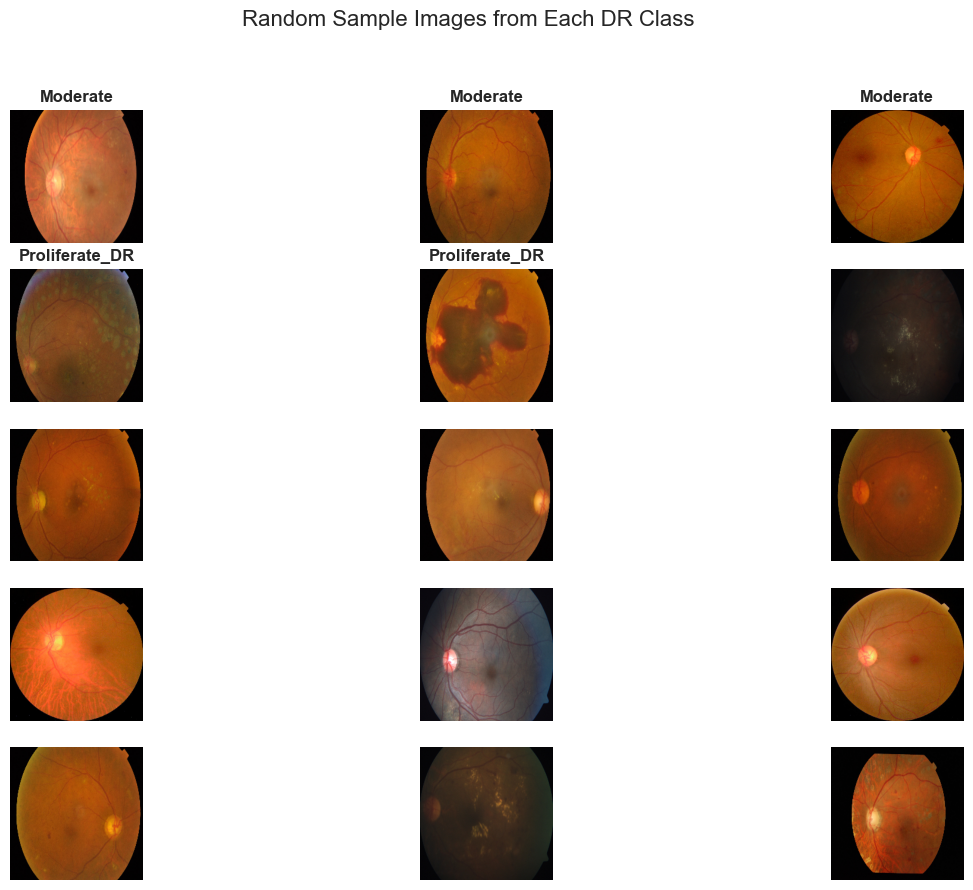

In [4]:
# --- Show few random samples from each class ---
import numpy as np
import matplotlib.image as mpimg

def find_image(id_code):
    for root, dirs, files in os.walk(IMG_DIR):
        for file in files:
            if id_code in file:
                return os.path.join(root, file)
    return None

n_samples = 3  # number of images per class
classes = df['label_name'].unique()

plt.figure(figsize=(15, 10))
count = 1
for cls in classes:
    ids = df[df['label_name'] == cls]['id_code'].sample(n_samples, random_state=42)
    for id_code in ids:
        path = find_image(id_code)
        if path and os.path.exists(path):
            img = mpimg.imread(path)
            plt.subplot(len(classes), n_samples, count)
            plt.imshow(img)
            plt.axis('off')
            if count <= len(classes):
                plt.title(cls, fontsize=12, fontweight='bold')
            count += 1
plt.suptitle("Random Sample Images from Each DR Class", fontsize=16)
plt.show()


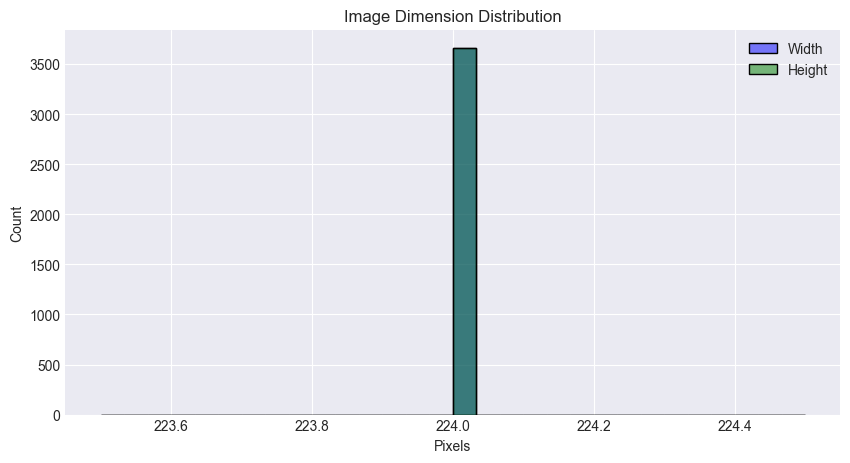

In [5]:
# --- Analyze image dimensions (optional, can take time for large datasets) ---
from tqdm import tqdm

dims = []
for root, dirs, files in os.walk(IMG_DIR):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(root, file)
            try:
                img = Image.open(path)
                dims.append(img.size)
            except:
                pass

widths, heights = zip(*dims)
plt.figure(figsize=(10,5))
sns.histplot(widths, bins=30, color='blue', label='Width', alpha=0.5)
sns.histplot(heights, bins=30, color='green', label='Height', alpha=0.5)
plt.legend()
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.show()


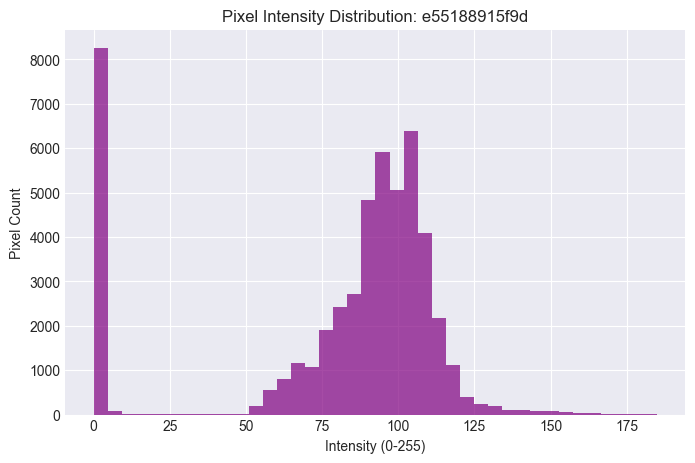

In [6]:
# --- Show intensity distribution for a random image ---
import numpy as np

sample_path = random.choice(df['id_code'].values)
path = find_image(sample_path)

if path:
    img = Image.open(path).convert("L")  # grayscale
    arr = np.asarray(img)
    plt.figure(figsize=(8,5))
    plt.hist(arr.flatten(), bins=40, color='purple', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution: {sample_path}")
    plt.xlabel("Intensity (0-255)")
    plt.ylabel("Pixel Count")
    plt.show()
else:
    print("Sample image not found.")


In [7]:
# --- Check if folder names match diagnosis labels ---
folder_classes = [d for d in os.listdir(IMG_DIR) if os.path.isdir(os.path.join(IMG_DIR, d))]
print("Folders found in colored_images:", folder_classes)

print("\nUnique labels in CSV:", df['label_name'].unique())

if set(folder_classes) == set(df['label_name'].unique()):
    print("\n✅ Folder structure matches CSV labels.")
else:
    print("\n⚠️ Folder structure and CSV labels may differ.")


Folders found in colored_images: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

Unique labels in CSV: ['Moderate' 'Proliferate_DR' 'Mild' 'No_DR' 'Severe']

✅ Folder structure matches CSV labels.
